<a href="https://colab.research.google.com/github/BernieT7/ML/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)

x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
from sklearn.model_selection import train_test_split
import torch

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

y_train, y_test

(tensor([ 91.7000,  57.0000,  98.2000,  42.8000,  64.4000, 116.9000,  37.7000,
          39.8000,  61.1000,  67.9000,  83.0000,  39.3000, 113.8000,  56.6000,
          54.4000,  55.7000, 101.3000,  60.1000,  36.2000,  66.0000, 105.5000,
          43.5000, 122.3000,  56.9000, 109.4000,  63.2000], dtype=torch.float64),
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
        dtype=torch.float64))

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.rand(1, requires_grad=True))
    self.b = nn.Parameter(torch.rand(1, requires_grad=True))

  def forward(self, x):
    return self.w*x + self.b

In [ ]:
torch.manual_seed(77)
model = LinearRegressionModel()

In [ ]:
cost_fn = nn.MSELoss()
y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [ ]:
epochs = 1000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):
  model.train()

  y_pred = model(x_train)
  train_cost = cost_fn(y_pred, y_train)

  optimizer.zero_grad()

  train_cost.backward()

  optimizer.step()

  train_cost_hist.append(train_cost.detach().numpy())

  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)
    test_cost = cost_fn(test_pred, y_test)
    test_cost_hist.append(test_cost)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch:5}, Train Cost: {train_cost: 2e}, Test Cost: {test_cost: 2e}")

Epoch:     0, Train Cost:  4.838592e+03, Test Cost:  5.213207e+03
Epoch:    10, Train Cost:  1.465325e+03, Test Cost:  1.514587e+03
Epoch:    20, Train Cost:  5.356599e+02, Test Cost:  5.650931e+02
Epoch:    30, Train Cost:  2.786543e+02, Test Cost:  3.387377e+02
Epoch:    40, Train Cost:  2.068220e+02, Test Cost:  2.939029e+02
Epoch:    50, Train Cost:  1.859734e+02, Test Cost:  2.898881e+02
Epoch:    60, Train Cost:  1.791698e+02, Test Cost:  2.923424e+02
Epoch:    70, Train Cost:  1.762431e+02, Test Cost:  2.940961e+02
Epoch:    80, Train Cost:  1.743942e+02, Test Cost:  2.943688e+02
Epoch:    90, Train Cost:  1.728526e+02, Test Cost:  2.935685e+02
Epoch:   100, Train Cost:  1.714060e+02, Test Cost:  2.921326e+02
Epoch:   110, Train Cost:  1.699958e+02, Test Cost:  2.903510e+02
Epoch:   120, Train Cost:  1.686060e+02, Test Cost:  2.883920e+02
Epoch:   130, Train Cost:  1.672318e+02, Test Cost:  2.863481e+02
Epoch:   140, Train Cost:  1.658719e+02, Test Cost:  2.842687e+02
Epoch:   1

<function matplotlib.pyplot.show(close=None, block=None)>

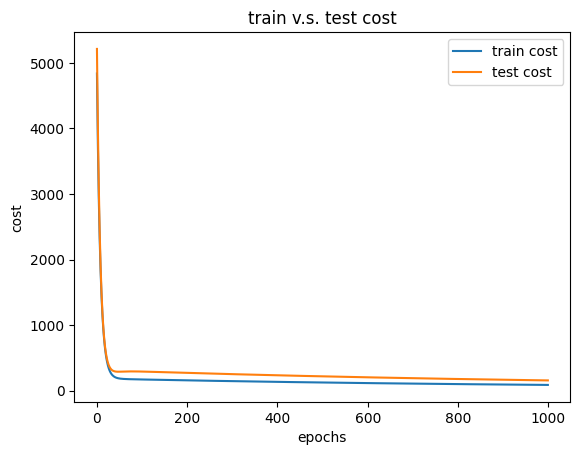

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0, 1000), train_cost_hist, label="train cost")
plt.plot(range(0, 1000), test_cost_hist, label="test cost")
plt.title("train v.s. test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show

In [ ]:
torch.save(obj=model.state_dict(), f="model/linear_regression.pth")

In [ ]:
model_load = LinearRegressionModel()
model_load.load_state_dict(torch.load(f="model/linear_regression.pth"))
model_load.state_dict()

OrderedDict([('w', tensor([11.6301])), ('b', tensor([11.9943]))])

In [ ]:
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1, dtype=torch.float64)

  def forward(self, x):
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(87)
model_2 = LinearRegressionModel2()
model_2, model_2.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.9419]], dtype=torch.float64)),
              ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))]))

In [ ]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
cost_fn = nn.MSELoss()
y_pred = model_2(x_train)
cost = cost_fn(y_pred, y_train)
print(model_2.state_dict())
print(cost)

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model_2(x_train)
cost = cost_fn(y_pred, y_train)
print(model_2.state_dict())
print(cost)

OrderedDict([('linear_layer.weight', tensor([[-0.9419]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))])
tensor(6515.9517, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[7.8250]], dtype=torch.float64)), ('linear_layer.bias', tensor([1.7790], dtype=torch.float64))])
tensor(1074.6975, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [ ]:
epochs = 10000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):

  model_2.train()

  y_pred = model_2(x_train)

  train_cost = cost_fn(y_pred, y_train)
  train_cost_hist.append(train_cost.detach().numpy())

  optimizer.zero_grad()

  train_cost.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test)
    test_cost = cost_fn(test_pred, y_test)
    test_cost_hist.append(test_cost)

  if epoch%1000==0:
    print(f"Epoch: {epoch:5}, Train Cost: {train_cost: .4e}, Test Cost: {test_cost: .4e}")

Epoch:     0, Train Cost:  1.0747e+03, Test Cost:  3.7437e+02
Epoch:  1000, Train Cost:  3.2600e+01, Test Cost:  3.4717e+01
Epoch:  2000, Train Cost:  3.2594e+01, Test Cost:  3.4187e+01
Epoch:  3000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  4000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  5000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  6000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  7000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  8000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  9000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01


In [ ]:
!nvidia-smi

Mon Jul 15 10:44:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              29W /  70W |    105MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count()

1

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
tensor = torch.tensor([1, 2, 3], device=device)
tensor, tensor.device

(tensor([1, 2, 3], device='cuda:0'), device(type='cuda', index=0))

In [ ]:
model_3 = LinearRegressionModel2()
model_3 = model_3.to(device)
model_3.linear_layer.weight.device, model_3.linear_layer.bias.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [ ]:
cost_fn = nn.MSELoss()
y_pred = model_3(x_train)
cost = cost_fn(y_pred, y_train)
print(model_3.state_dict())
print(cost)

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model_3(x_train)
cost = cost_fn(y_pred, y_train)
print(model_3.state_dict())
print(cost)

OrderedDict([('linear_layer.weight', tensor([[-0.2918]], device='cuda:0', dtype=torch.float64)), ('linear_layer.bias', tensor([-0.2794], device='cuda:0', dtype=torch.float64))])
tensor(6039.2049, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[8.1315]], device='cuda:0', dtype=torch.float64)), ('linear_layer.bias', tensor([1.1729], device='cuda:0', dtype=torch.float64))])
tensor(1014.4567, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)


In [ ]:
epochs = 10000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):

  model_3.train()

  y_pred = model_3(x_train)

  train_cost = cost_fn(y_pred, y_train)
  train_cost_hist.append(train_cost.cpu().detach().numpy())

  optimizer.zero_grad()

  train_cost.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(x_test)
    test_cost = cost_fn(test_pred, y_test)
    test_cost_hist.append(test_cost.cpu())

  if epoch%1000==0:
    print(f"Epoch: {epoch:5}, Train Cost: {train_cost: .4e}, Test Cost: {test_cost: .4e}")

Epoch:     0, Train Cost:  1.0145e+03, Test Cost:  3.7527e+02
Epoch:  1000, Train Cost:  3.2600e+01, Test Cost:  3.4731e+01
Epoch:  2000, Train Cost:  3.2594e+01, Test Cost:  3.4187e+01
Epoch:  3000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  4000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  5000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  6000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  7000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  8000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01
Epoch:  9000, Train Cost:  3.2594e+01, Test Cost:  3.4184e+01


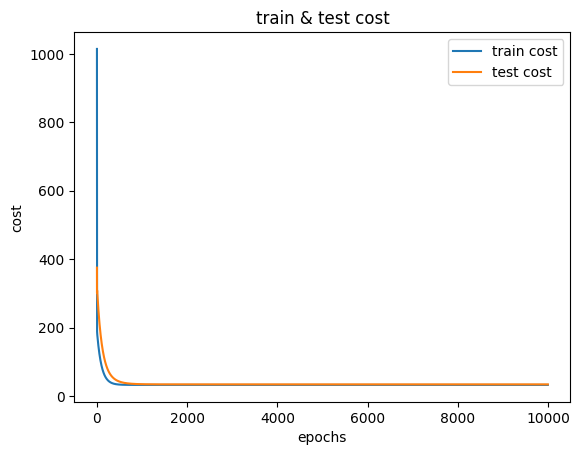

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0, 10000), train_cost_hist, label="train cost")
plt.plot(range(0, 10000), test_cost_hist, label="test cost")
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

In [ ]:
torch.save(obj=model_3.state_dict(), f="model/linear_regression_2.pth")

In [ ]:
model_4 = LinearRegressionModel2()
model_4.load_state_dict(torch.load(f="model/linear_regression_2.pth"))
model_4.state_dict()

OrderedDict([('linear_layer.weight', tensor([[9.3308]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([26.6288], dtype=torch.float64))])

In [ ]:
model_4.to(device)
model_4.eval()
with torch.inference_mode():
  y_pred = model_4(x_test)
y_pred, y_test